In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as sta
import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
%matplotlib inline

In [65]:
train_df = pd.read_csv('D:/数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/train_data.csv')
test_df = pd.read_csv('D:\数据分析练习/2019未来高校AI挑战赛_城市-房产租金预测/test_a.csv')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

train_df.info()

In [11]:
train_df.describe()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41422.000000,41422.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,57.756733,36.016096,49.063996,270.662403,8.172201,6.268871,83.091892,6.846917e+08,18229.686548,40131.678952,221.995367,3.684008e+08,6865.193509,47171.176127,57.971597,370.544643,78.364817,0.179319,15037.786284,0.147732,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26945.663512,3089.077085,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,40.083870,20.449362,34.506996,187.251770,6.916785,4.498596,60.626425,4.516918e+08,11843.927070,13243.839664,134.169988,6.445704e+08,11884.242467,35100.194577,108.478780,488.210529,194.266696,0.529140,50239.983907,0.557242,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32174.637924,2954.706517,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,8.000000,1.000000,7.000000,10.000000,0.000000,0.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,33.000000,25.000000,24.000000,154.000000,4.000000,3.000000,46.000000,3.932300e+08,9254.170000,31147.211540,127.000000,6.841255e+06,160.000000,29084.713320,1.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,40.000000,34.000000,41.000000,214.000000,6.000000,5.000000,61.000000,5.718662e+08,15935.910000,39430.856560,195.000000,1.042774e+08,1618.000000,41788.375860,8.000000,214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,83.000000,41.000000,62.000000,341.000000,10.000000,7.000000,119.000000,8.781700e+08,24988.510000,49738.263640,301.000000,4.029358e+08,8995.000000,68808.852910,64.000000,524.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,174.000000,88.000000,207.000000,824.000000,30.000000,19.000000,299.000000,2.402060e+09,60550.850000,112471.174100,675.000000,4.451044e+09,85922.000000,299318.753400,825.000000,5290.000000,1347.000000,3.000000,555508.010000,5.000000,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.0000

可以看出来特征的outlier很严重

### 1.训练集和测试集的空值统计

In [16]:
combine = [train_df,test_df]
for dataSet in combine:
    Total = dataSet.isnull().sum().sort_values(ascending=False)
    Percent = Total/dataSet.isnull().count()
    Missing_count = pd.concat([Total,Percent],axis=1,keys=['Total','Percent'],sort=False)
    print(Missing_count.head(2))
    print('--------------------')

    Total   Percent
uv     18  0.000434
pv     18  0.000434
--------------------
    Total  Percent
uv      2  0.00081
pv      2  0.00081
--------------------


我们可以看到：pv和uv都有少量的缺失值，其中pv表示该板块当月租客浏览网页次数，uv表示该板块当月租客浏览网页总人数　。这里，我们可以使用均值，
中位数，众数等简单的方法进行填充。但是，通过散点图分析，这两个点有很强的的关联，故可以用一个特征来表示：

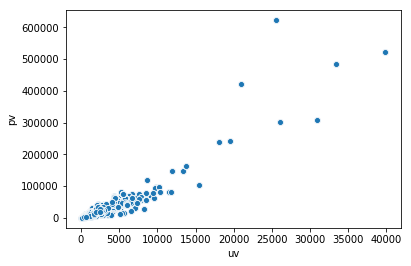

In [18]:
sns.scatterplot(x='uv',y='pv',data=train_df)

### 2.预测变量的峰度和偏度分析

In [57]:
#预测变量的分布

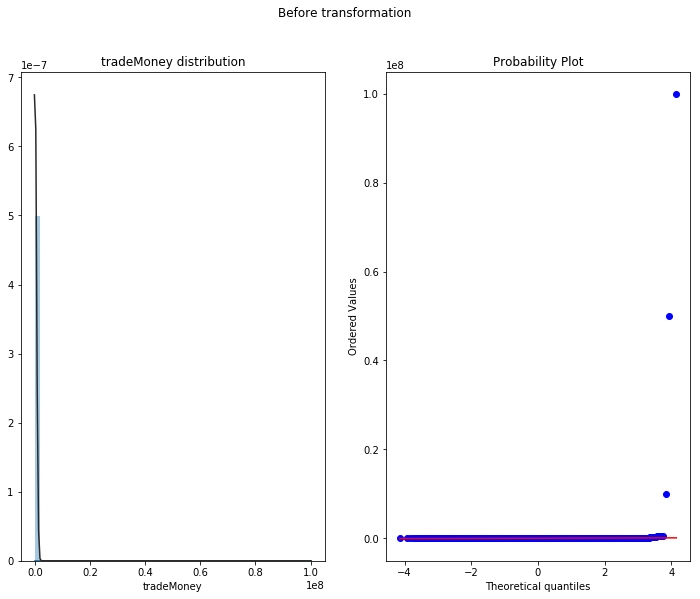

In [77]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(121)
sns.distplot(train_df['tradeMoney'],fit=norm)
plt.title('tradeMoney distribution')
ax2 = fig.add_subplot(122)
sta.probplot(train_df['tradeMoney'],plot=plt)
plt.suptitle('Before transformation')
plt.show()

In [78]:
#分块分析一下

In [121]:
#pd.qcut(train_df['tradeMoney'],q=4)

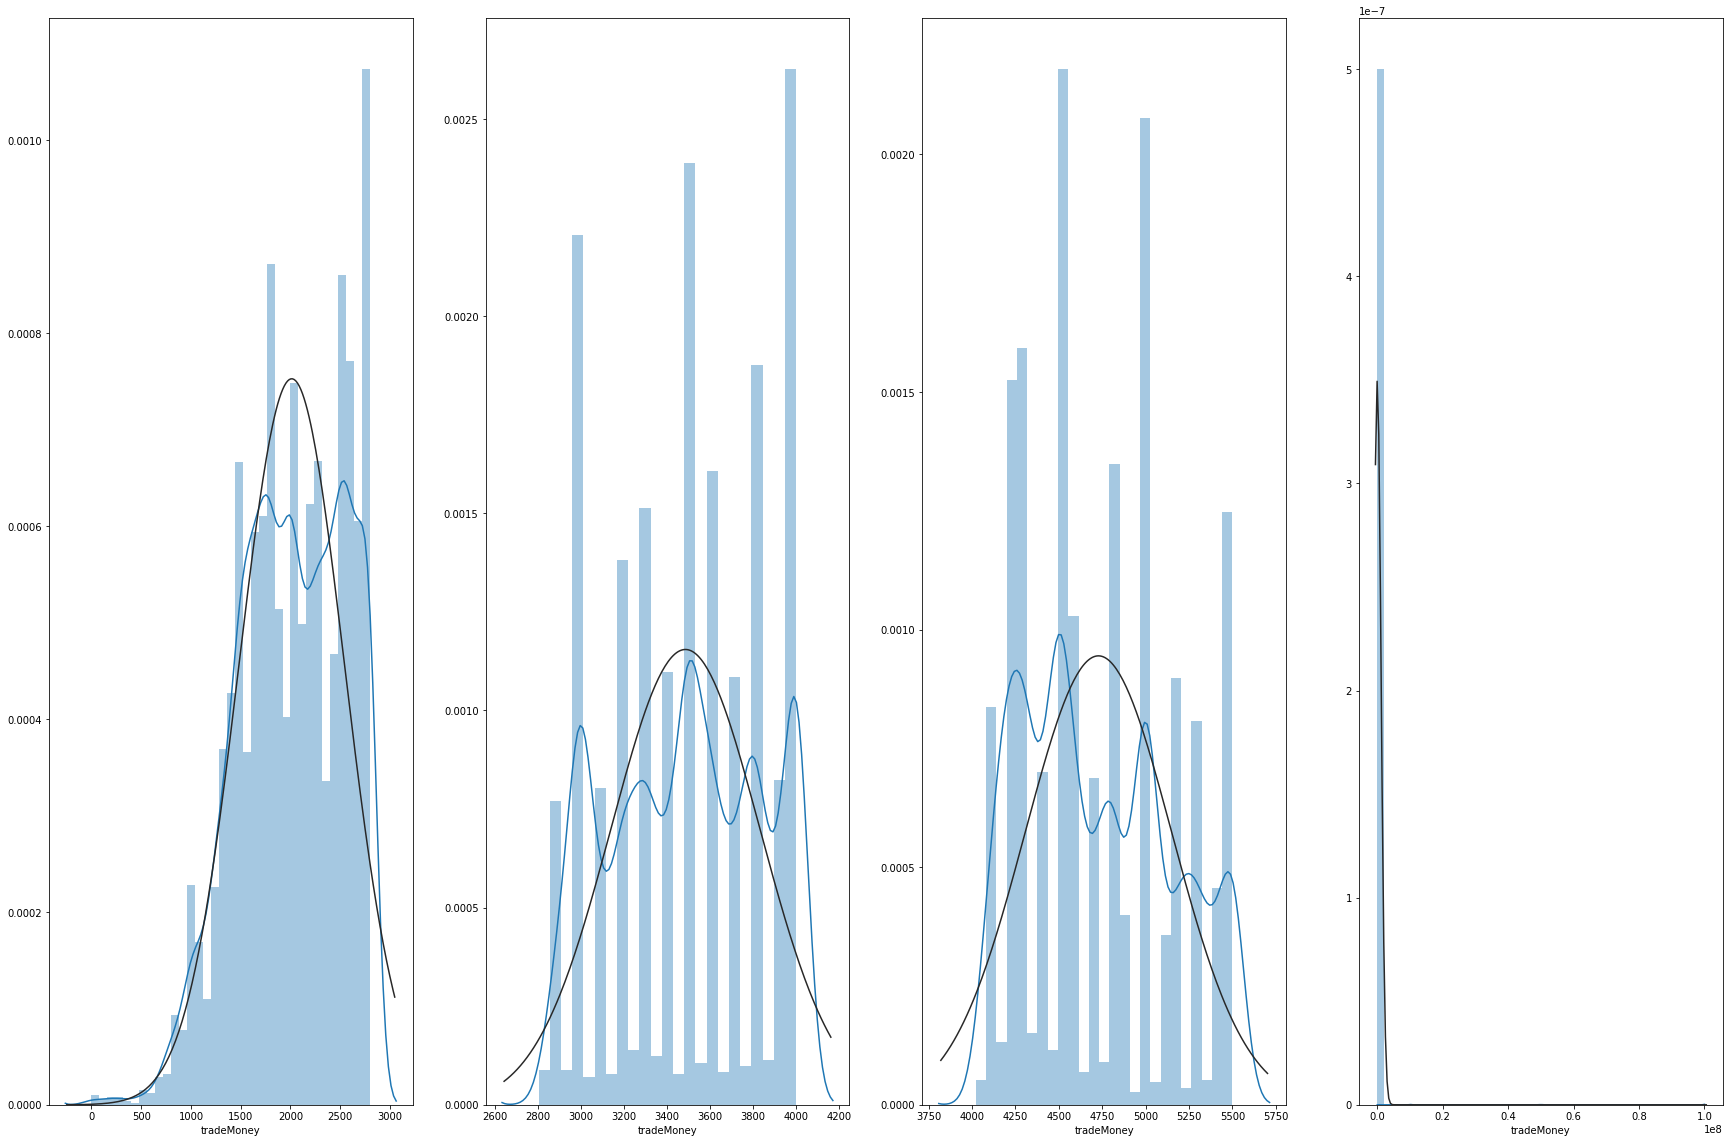

In [81]:
tradeMoney_1 = train_df.loc[train_df['tradeMoney']<=2800,'tradeMoney']
tradeMoney_2 = train_df.loc[(train_df['tradeMoney']>2800)&(train_df['tradeMoney']<=4000),'tradeMoney']
tradeMoney_3 = train_df.loc[(train_df['tradeMoney']>4000)&(train_df['tradeMoney']<=5500),'tradeMoney']
tradeMoney_4 = train_df.loc[train_df['tradeMoney']>5500,'tradeMoney']
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(30,20))
sns.distplot(tradeMoney_1,fit=norm,ax=ax1)
sns.distplot(tradeMoney_2,fit=norm,ax=ax2)
sns.distplot(tradeMoney_3,fit=norm,ax=ax3)
sns.distplot(tradeMoney_4,fit=norm,ax=ax4)
plt.show()

可以看出来，大于5500的数据分布不符合正态分布，删掉

In [96]:
train_df = train_df[train_df['tradeMoney']<=5500]

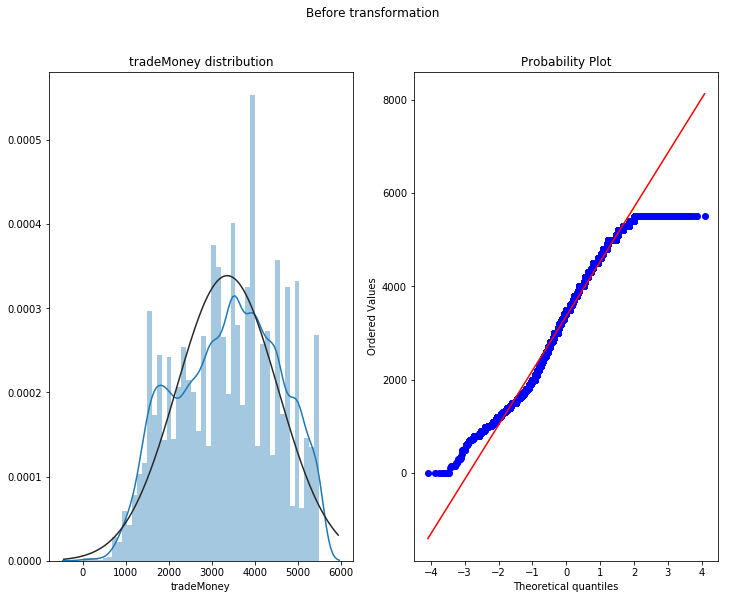

In [97]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(121)
sns.distplot(train_df['tradeMoney'],fit=norm)
plt.title('tradeMoney distribution')
ax2 = fig.add_subplot(122)
sta.probplot(train_df['tradeMoney'],plot=plt)
plt.suptitle('Before transformation')
plt.show()

后面我们需要对数据做进一步的处理，使其符合正太分布，一般使用对数转换。

In [67]:
#计算峰度和偏度

In [98]:
print("Skewness:%f"%train_df['tradeMoney'].skew())
print("Kurtness:%f"%train_df['tradeMoney'].kurt())

Skewness:-0.133653
Kurtness:-0.881753


### 3.特征的相关性分析

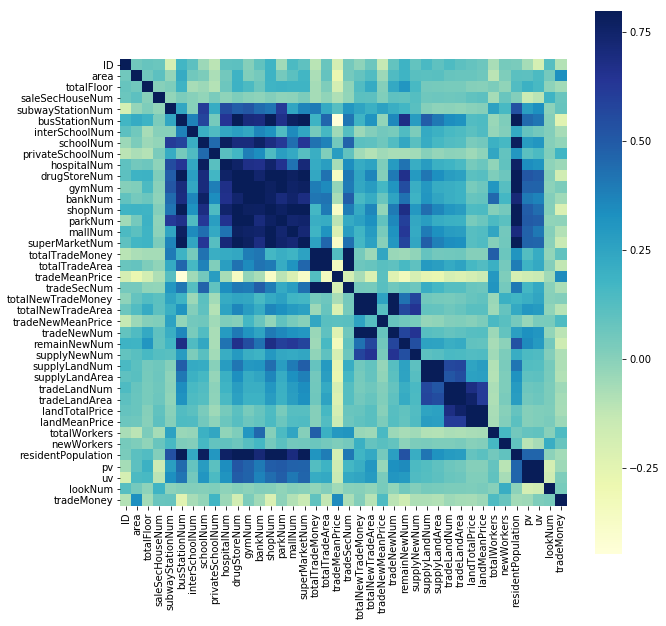

In [86]:
corr_mat = train_df.corr()
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr_mat,vmax=.8,square=True,ax=ax,cmap='YlGnBu')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

好像关联性不是很强。。。数据非常不好，很 “脏”。

### 3.特征nunique分布

In [21]:
## 数值型数据和类别型数据

In [24]:
data_feature = pd.concat((train_df,test_df)).reset_index(drop=True)
categorial_feature = data_feature.select_dtypes(include=['object']).columns
numerical_feature = data_feature.select_dtypes(exclude=['object']).columns
## 类别型特征
categorial_feature

Index(['buildYear', 'city', 'communityName', 'houseDecoration', 'houseFloor',
       'houseToward', 'houseType', 'plate', 'region', 'rentType', 'tradeTime'],
      dtype='object')

In [25]:
#数值型特征
numerical_feature

Index(['ID', 'area', 'bankNum', 'busStationNum', 'drugStoreNum', 'gymNum',
       'hospitalNum', 'interSchoolNum', 'landMeanPrice', 'landTotalPrice',
       'lookNum', 'mallNum', 'newWorkers', 'parkNum', 'privateSchoolNum', 'pv',
       'remainNewNum', 'residentPopulation', 'saleSecHouseNum', 'schoolNum',
       'shopNum', 'subwayStationNum', 'superMarketNum', 'supplyLandArea',
       'supplyLandNum', 'supplyNewNum', 'totalFloor', 'totalNewTradeArea',
       'totalNewTradeMoney', 'totalTradeArea', 'totalTradeMoney',
       'totalWorkers', 'tradeLandArea', 'tradeLandNum', 'tradeMeanPrice',
       'tradeMoney', 'tradeNewMeanPrice', 'tradeNewNum', 'tradeSecNum', 'uv'],
      dtype='object')

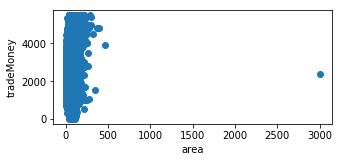

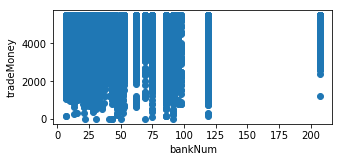

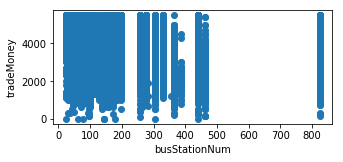

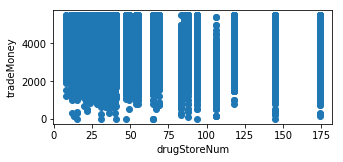

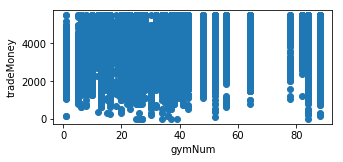

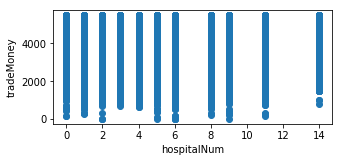

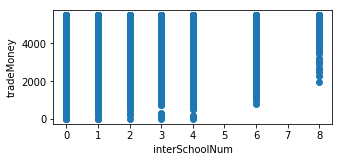

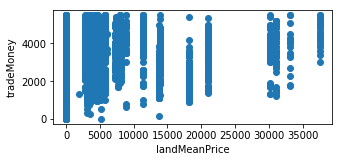

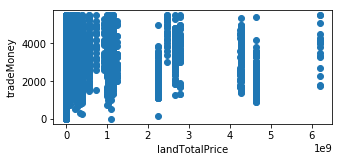

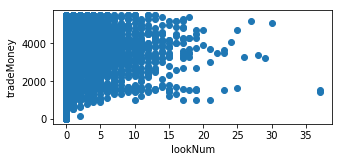

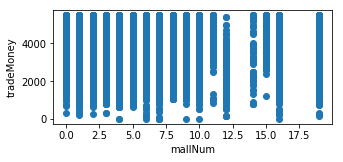

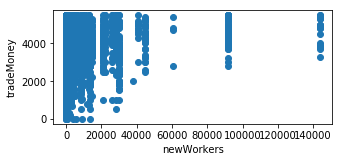

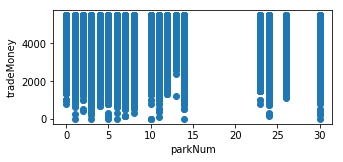

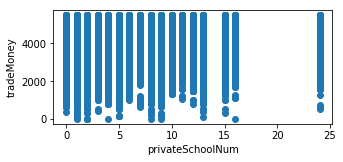

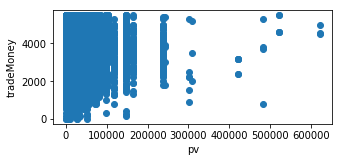

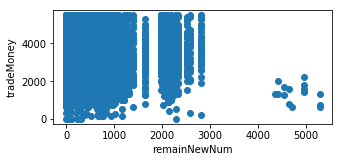

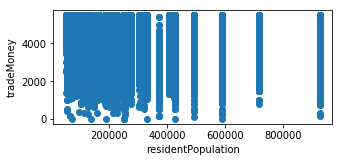

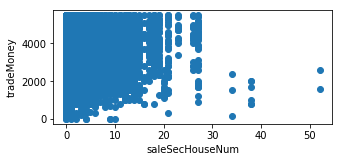

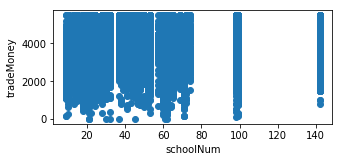

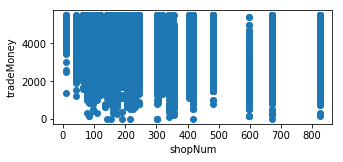

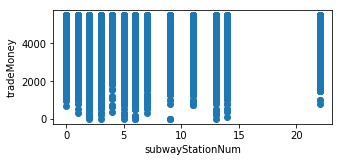

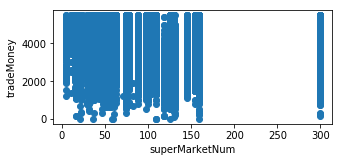

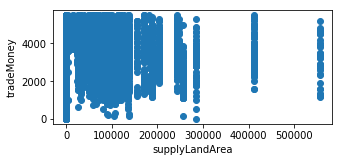

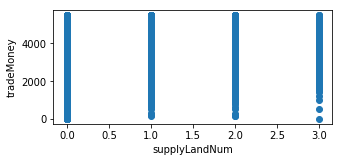

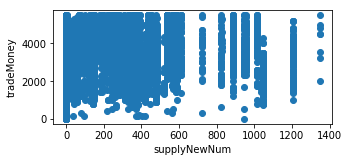

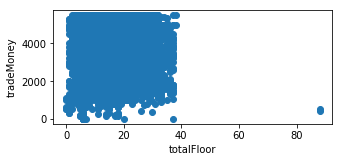

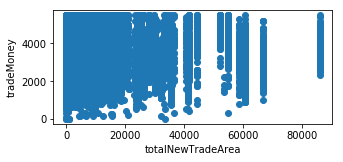

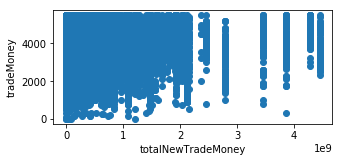

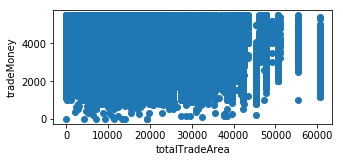

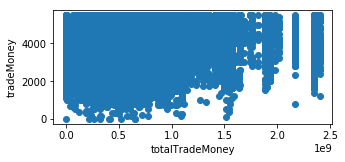

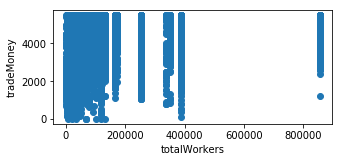

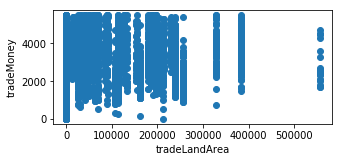

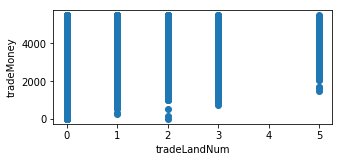

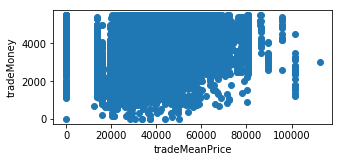

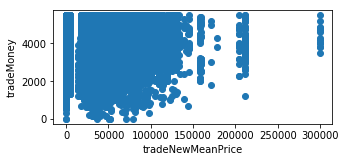

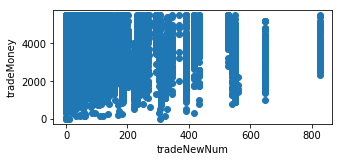

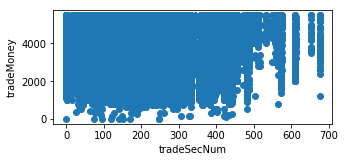

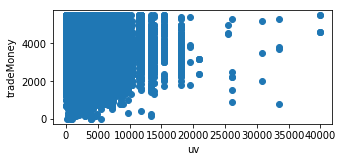

In [87]:
cols = [c for c in list(numerical_feature) if c not in ['tradeMoney','ID']]
i=0
for col in cols:  
    df_values = train_df[col].values
    plt.figure(figsize=(5,100)) 

    
    i+=1
    plt.subplot(len(numerical_feature),1,i)
    plt.scatter(df_values, train_df['tradeMoney'])
    plt.xlabel(col)    
    plt.ylabel('tradeMoney')
    plt.show()
#单调列有：saleSecHouseNum、totalNewTradeArea、tradeNewNum、remainNewNum、
# pv、uv、lookNum、bulidYear

In [38]:
## 出现在测试集中的community,但在训练集中数量较少

In [88]:
train_df['communityName'].unique().shape[0]

3457

In [89]:
test_df['communityName'].unique().shape[0]

2469

In [49]:
## 特征值个数大于100的categorical 变量

In [90]:
for index in categorial_feature:
    print("{0}:  train_df:  {1}    test_df:  {2}".format(index,(len(train_df[index].value_counts())),(len(test_df[index].value_counts()))))

buildYear:  train_df:  77    test_df:  67
city:  train_df:  1    test_df:  1
communityName:  train_df:  3457    test_df:  2469
houseDecoration:  train_df:  4    test_df:  4
houseFloor:  train_df:  3    test_df:  3
houseToward:  train_df:  10    test_df:  8
houseType:  train_df:  60    test_df:  31
plate:  train_df:  66    test_df:  63
region:  train_df:  15    test_df:  14
rentType:  train_df:  4    test_df:  3
tradeTime:  train_df:  360    test_df:  331


可以看出来，特征值个数大于100的有communityName、tradeTime，同时也可以看到，city的特征值只有一个，所以我们可以直接删掉这个特征。

In [55]:
data_feature = pd.concat((train_df,test_df)).reset_index(drop=True)
data_feature.drop(labels='city',axis=1,inplace=True)

In [106]:
## 房屋面积和交易价格的关系最为密切，我们看一下散点图

In [107]:
train_df['area'].describe()

count    31706.000000
mean        56.970613
std         29.998028
min          2.630000
25%         37.100000
50%         55.485000
75%         78.520000
max        198.000000
Name: area, dtype: float64

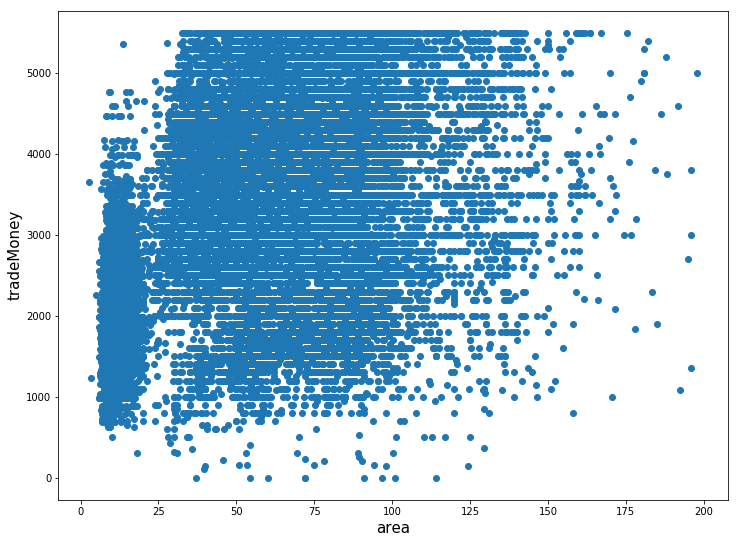

In [108]:
fig,ax = plt.subplots(figsize=(12,9))
plt.scatter(x='area',y='tradeMoney',data=train_df)
plt.xlabel('area',fontsize = 15)
plt.ylabel('tradeMoney',fontsize = 15)
plt.show()

In [109]:
# Numerical feature

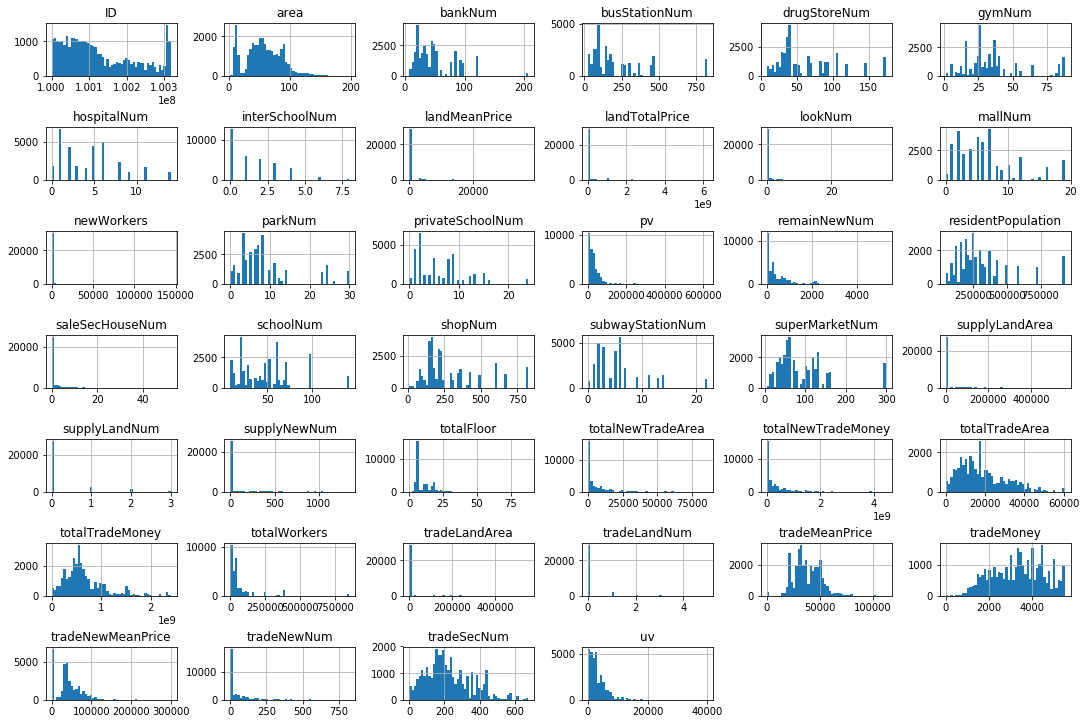

In [114]:
train_df.hist(bins=50,figsize=(15,10))
plt.tight_layout(pad=0.5)
plt.show()

测试集和训练集分布大致一致